In [15]:
# pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.9 MB 39.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import pydot
import requests
import graphviz
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set()

In [10]:
# read csv
data = pd.read_csv('DataTableToRegress-Forest.csv')
featnames = ['Fe', 'Ni', 'Ti', 'V', 'Cr', 'Nb']
# data.describe

In [11]:
# train_test_split
# X = pd.DataFrame(data[features], columns=features)  # Features
X = data[featnames]  # Features

# y = data['Tot Vol Frac Other']
y = data['Acceptable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       255
           1       0.81      0.87      0.84        76

    accuracy                           0.92       331
   macro avg       0.89      0.90      0.90       331
weighted avg       0.93      0.92      0.93       331



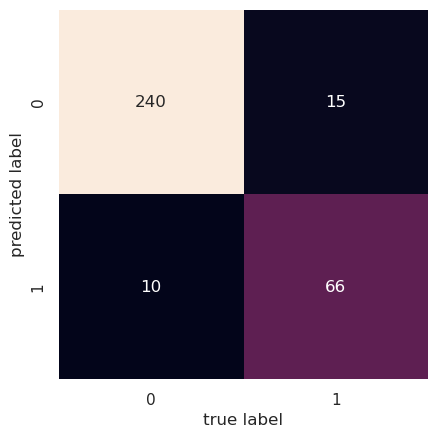

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

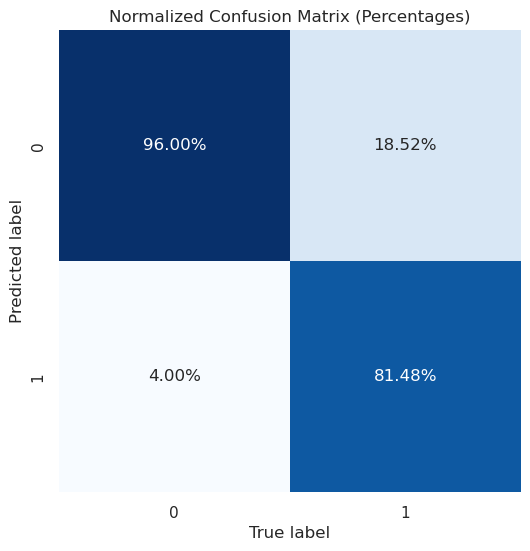

In [15]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
mat = confusion_matrix(y_test, y_pred)

# Calculate row-wise sums to get total true labels for each predicted label
row_sums = mat.sum(axis=1)

# Create a normalized confusion matrix (as percentages)
normalized_mat = mat / row_sums[:, np.newaxis]  # Divide each element by its row sum

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(normalized_mat.T, square=True, annot=True, fmt='.2%', cbar=False, cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Normalized Confusion Matrix (Percentages)')
plt.show()


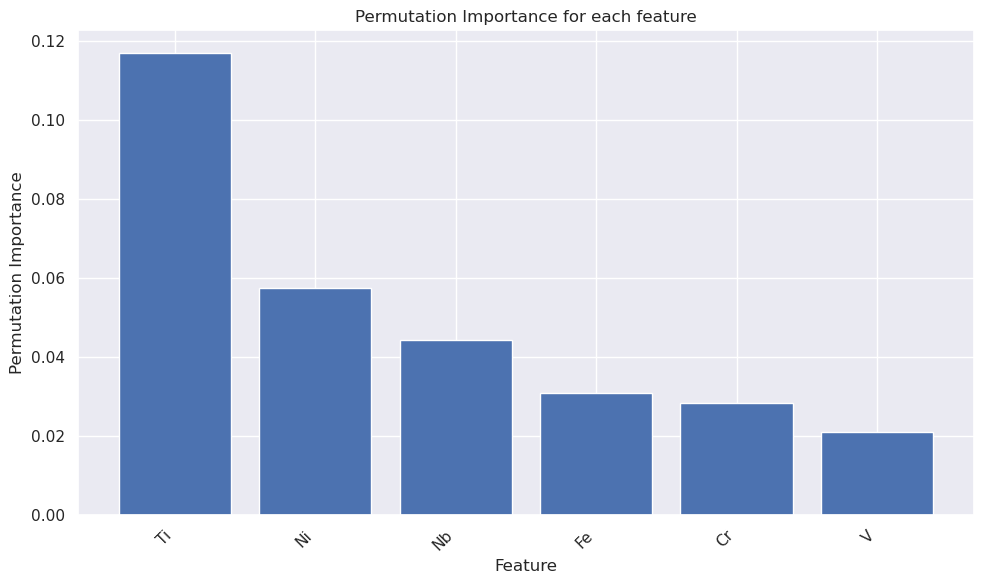

In [16]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

# Get the sorted indices of feature importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(X_test.shape[1]), np.array(featnames)[sorted_idx], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance for each feature')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

Ele = 'Ni'
position = featnames.index(Ele)

# Plot interaction plots for the first feature with each of the other features
for i in range(0, X_train.shape[1]):
    features = [position, i, (position,i)]  # 0 is the first feature, i varies from 1 to n_features-1
    display = PartialDependenceDisplay.from_estimator(model, X_train, features,
                                                      feature_names=featnames)
#     display.plot()
    plt.suptitle(f'Interaction Plot for {featnames[position]} and {featnames[i]}')
    plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for the title
    plt.show()


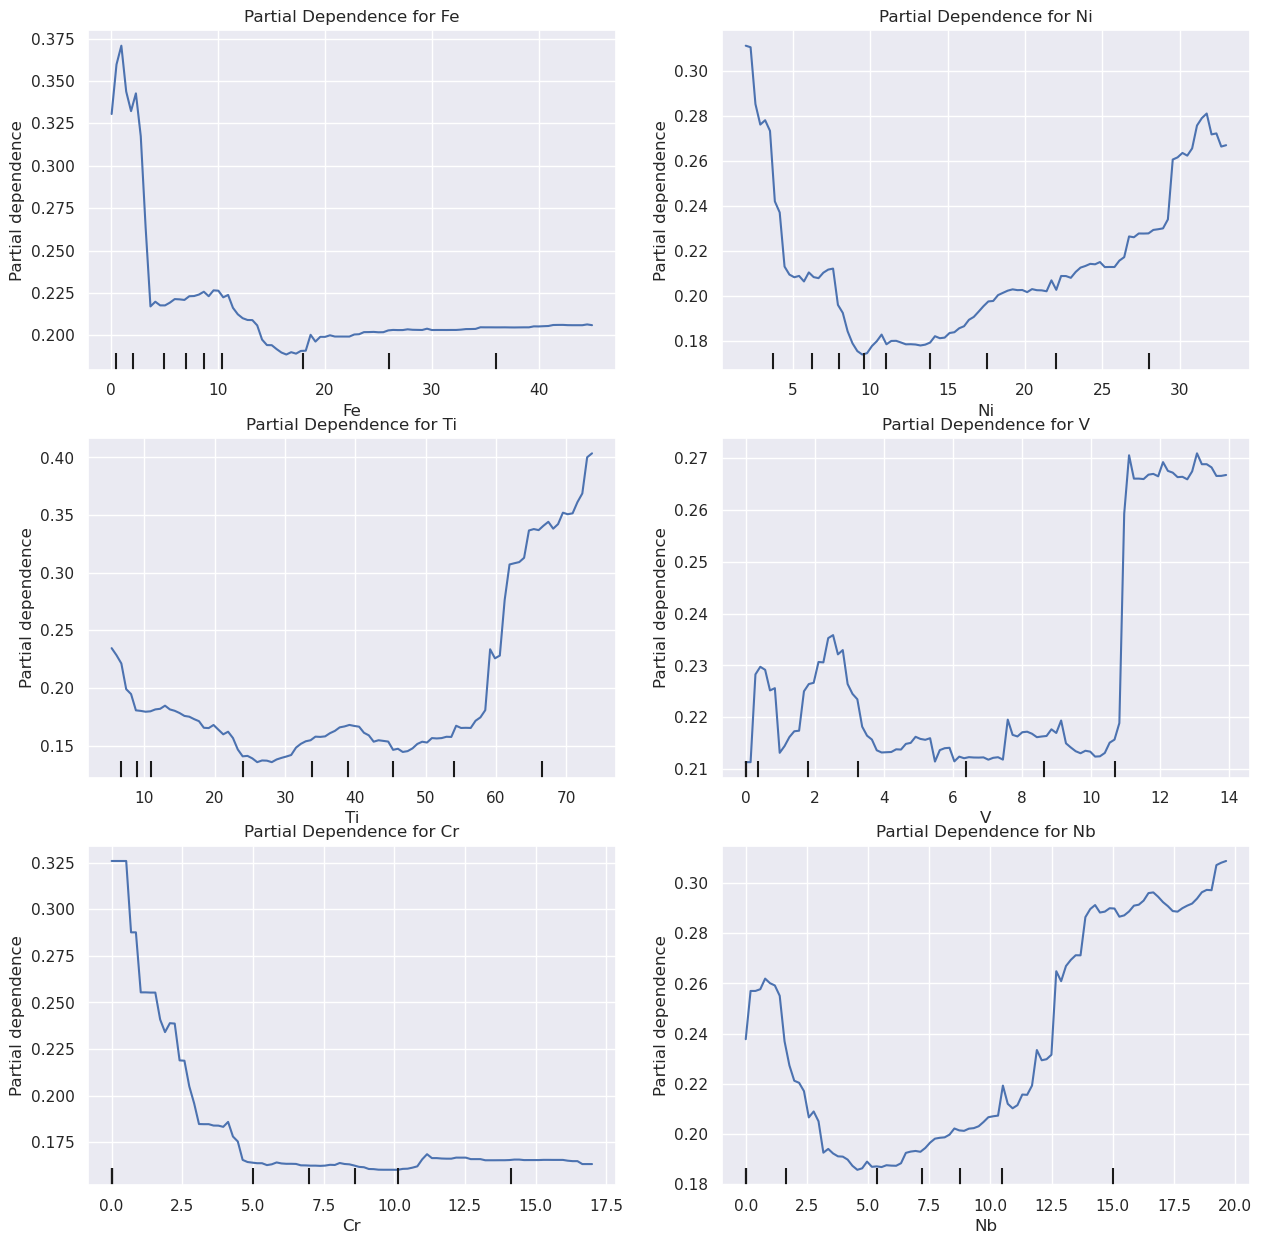

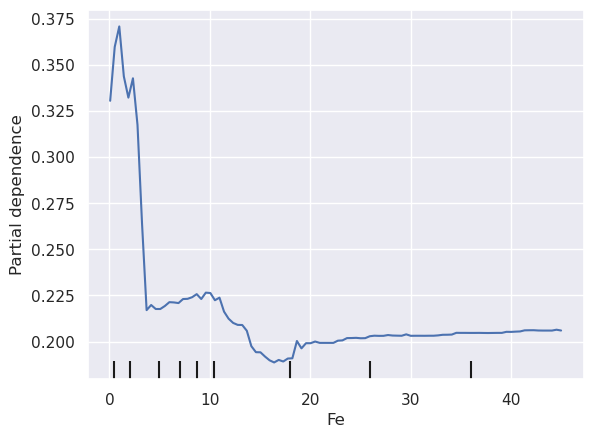

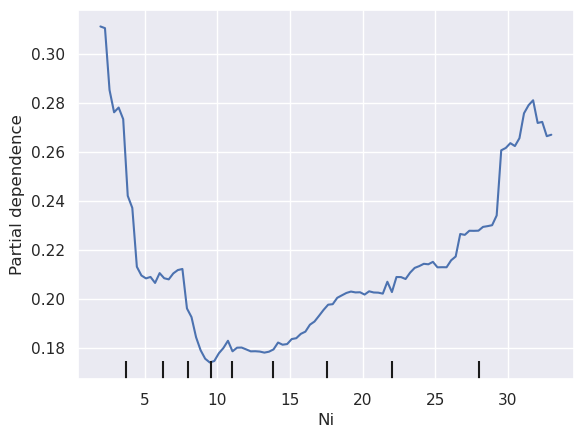

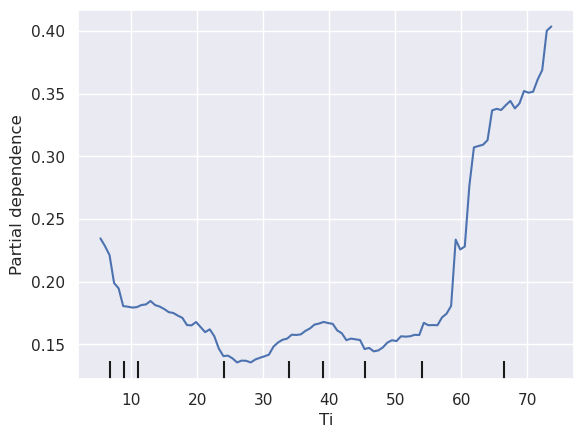

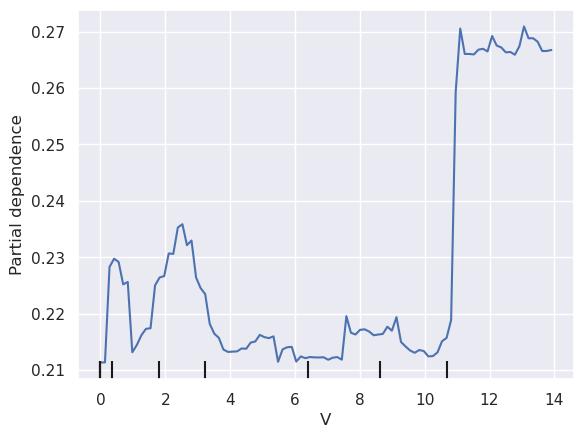

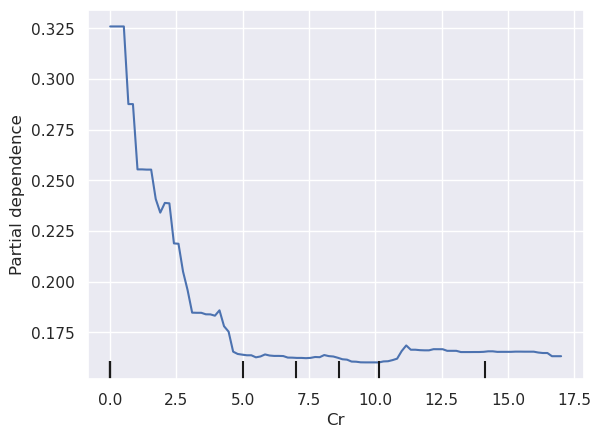

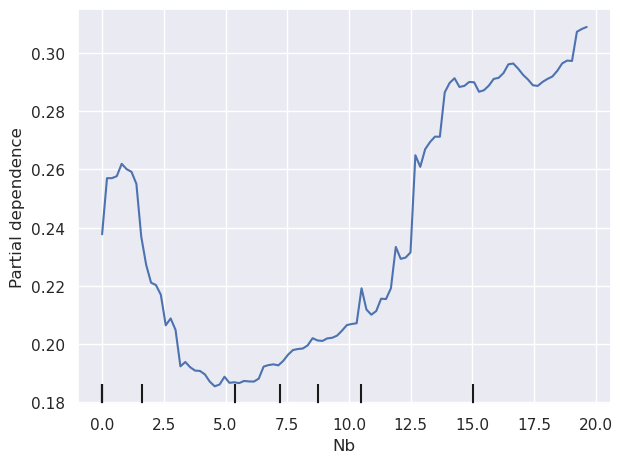

In [19]:
from math import ceil
from sklearn.inspection import PartialDependenceDisplay

# Get the number of features
num_features = X_train.shape[1]

# Calculate the number of rows needed for a 2-column layout
num_rows = ceil(num_features / 2)

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten the axes array in case we have only one row
axs = axs.flatten()

# Loop through each feature and plot its partial dependence
for i in range(num_features):
    row = i // 2
    col = i % 2
    feature_to_display = [(i,)]
    disp = PartialDependenceDisplay.from_estimator(model, X_train, features=feature_to_display)
    disp.plot(ax=axs[i])
    axs[i].set_title(f'Partial Dependence for {featnames[i]}')
    axs[i].set_xlabel(f'Feature {i}')
    axs[i].set_ylabel('Partial Dependence')

# Hide any empty subplots
for i in range(num_features, num_rows * 2):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()
